## Deliverables

- A Jupyter notebook containing all the code used.
- A short report (2-3 pages) summarizing the findings and insights from the exercises, including figures and tables as necessary. (This can but does not have to be done in LaTeX! It could be done in Markdown format inside the Jupyter Notebook)
- Submit work to the hand-in folder via the Moodle course - it is a group report but please hand in individually with all group member names and group name easy to find.

## Task 1: Data Exploration and Cleaning

**Objective:** Understand the dataset's structure, clean the data, and handle missing
values.

### 1.1 Find and Download a Dataset

Use Kaggle to find a dataset of interest. It should have both numerical and categorical data and some missing values.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = sns.load_dataset('taxis')

### 1.2 Data Exploration

- Load the dataset using pandas.
- Use .describe(), .info(), and .head() to explore the dataset's structure, summary statistics, and first few rows. Use comments or markdown cells to explain the data

In [3]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


**Data Explanation:** We can see very clearly that there are likely some very high outliers because from all the numerical columns, the max value is much further away from the 75% percentile than what all other percentiles are from each other.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

**Data Explanation:** We can see that there are 6433 entries in the dataset, but not all columns have that many non-null entries. This means that there are missing values in the dataset.

In [5]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**Data Explanation:** With just the first 5 rows of the dataset, we can just get a quick look at what the data looks like. We can see that there are some columns that are strings and some that are numerical.

### 1.3 Data Cleaning

- Identify columns with missing values.
- For numerical columns, interpolate missing values.
- For categorical columns, replace missing values with the mode or another standard technique (such as the mean of the two adjacent data points)
- Drop columns with more than 50% missing values.
- Drop extreme outliers and explain why they were considered outliers

In [6]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

**Data Explanation:** Like previously mentioned, we knew that some values were none. With this method we can just get a quick look at how many values are missing in each column, so we can decide what to do with them.

In [7]:
df[df.isnull().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


**Data Explanation:** We take a quick look at the columns that have missing values, where we can see that it is only a couple of columns per row that have missing values. All null values are typed in as `<NA>` in the dataset.

**Action:** We decided to remove the columns that have one or more missing values since it is less than 1,5% of all datarows, so we can afford to remove them.

In [8]:
# Drop rows with missing values
df = df.dropna()

In [9]:
# We will convert the object columns to string
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype("string")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   string        
 9   payment          6341 non-null   string        
 10  pickup_zone      6341 non-null   string        
 11  dropoff_zone     6341 non-null   string        
 12  pickup_borough   6341 non-null   string        
 13  dropoff_borough  6341 non-null   string        
dtypes: datetime64[ns](2), float64(5), int64(1), s

**Data Explanation:** We look at the df.info() again to see that our changes have been made.

In [11]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


**Data Explanation:** We look at df.describe() again to see if there have been a significant change in the data since we removed the columns with missing values. It was only very small changes that happened besides tip's max value which was 33.2 and now is 23.19.

### 1.4 Data Visualization

- Use matplotlib or seaborn to visualize the distribution of variables both quantitative and categorical (parametric and non-parametric)

In [12]:
# List of quantitative features
quantative_features = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

# List of categorical features
categorical_features = ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

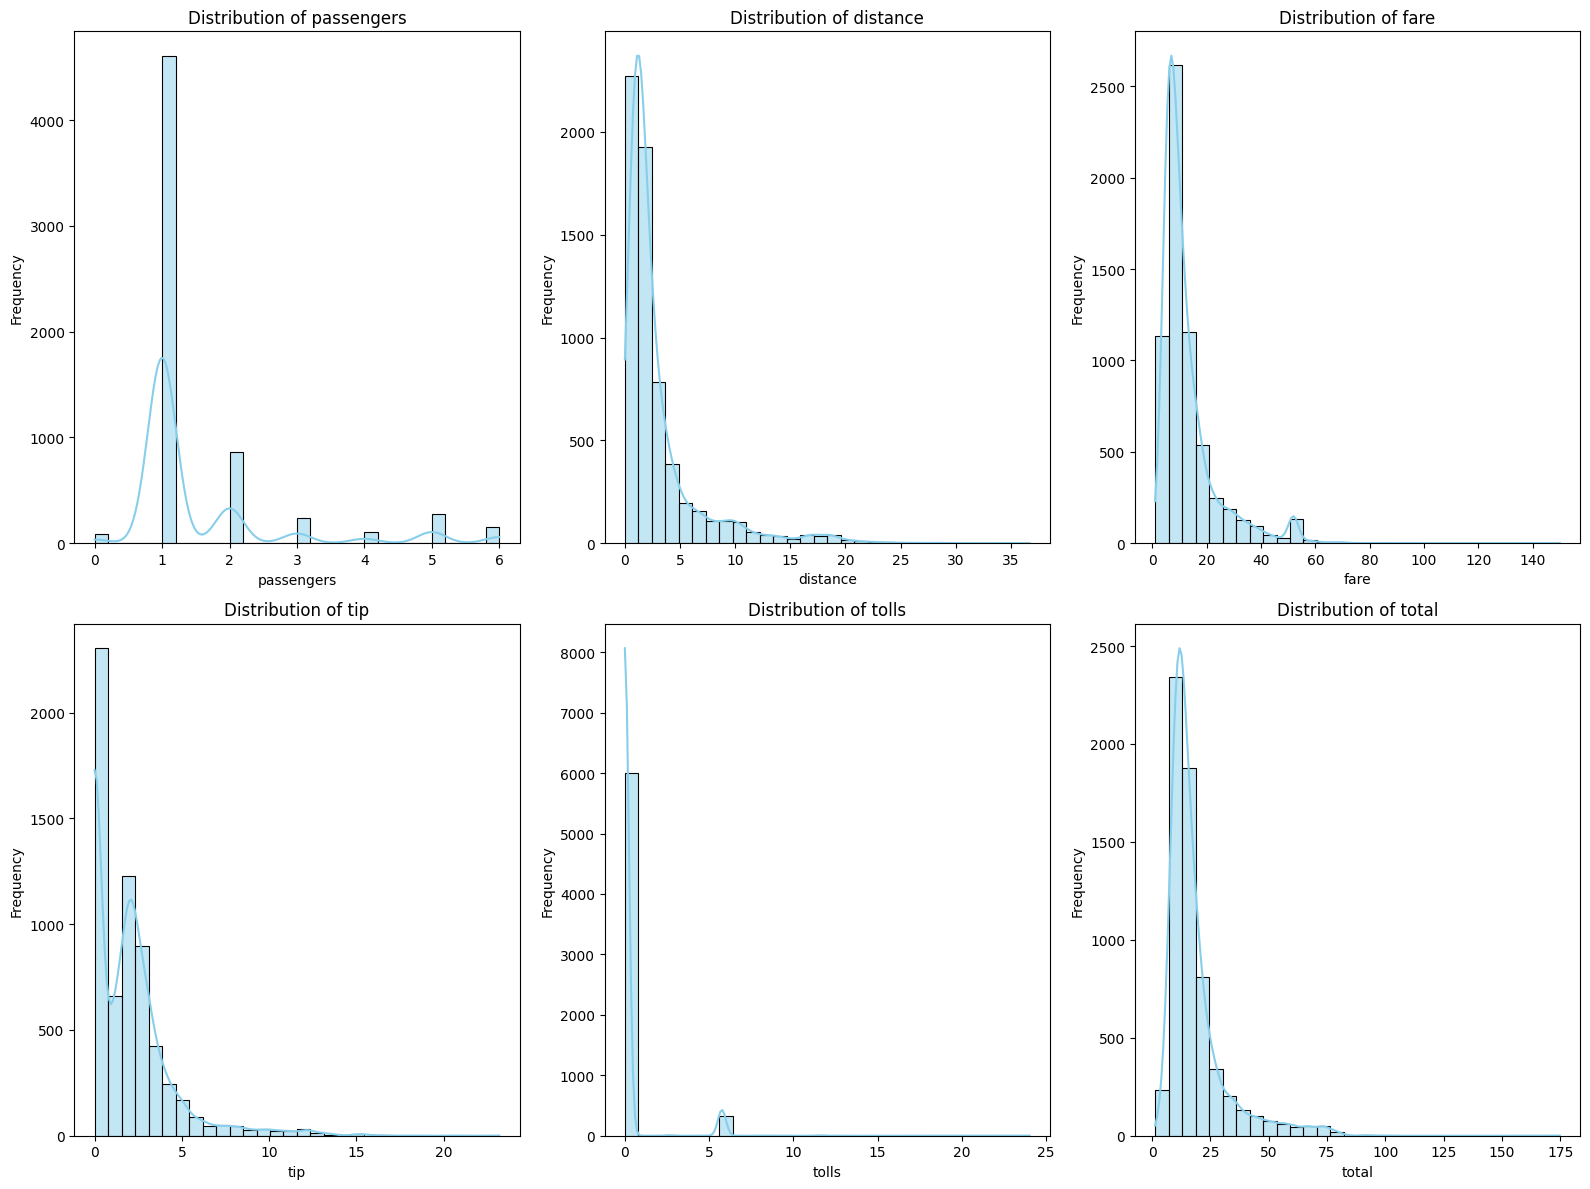

In [13]:
# Histograms with KDE for quantitative feature distribution
plt.figure(figsize=(16, 12))
for i, feature in enumerate(quantative_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Data Explanation:** We can see that all the numerical columns most of the values are left-skewed.

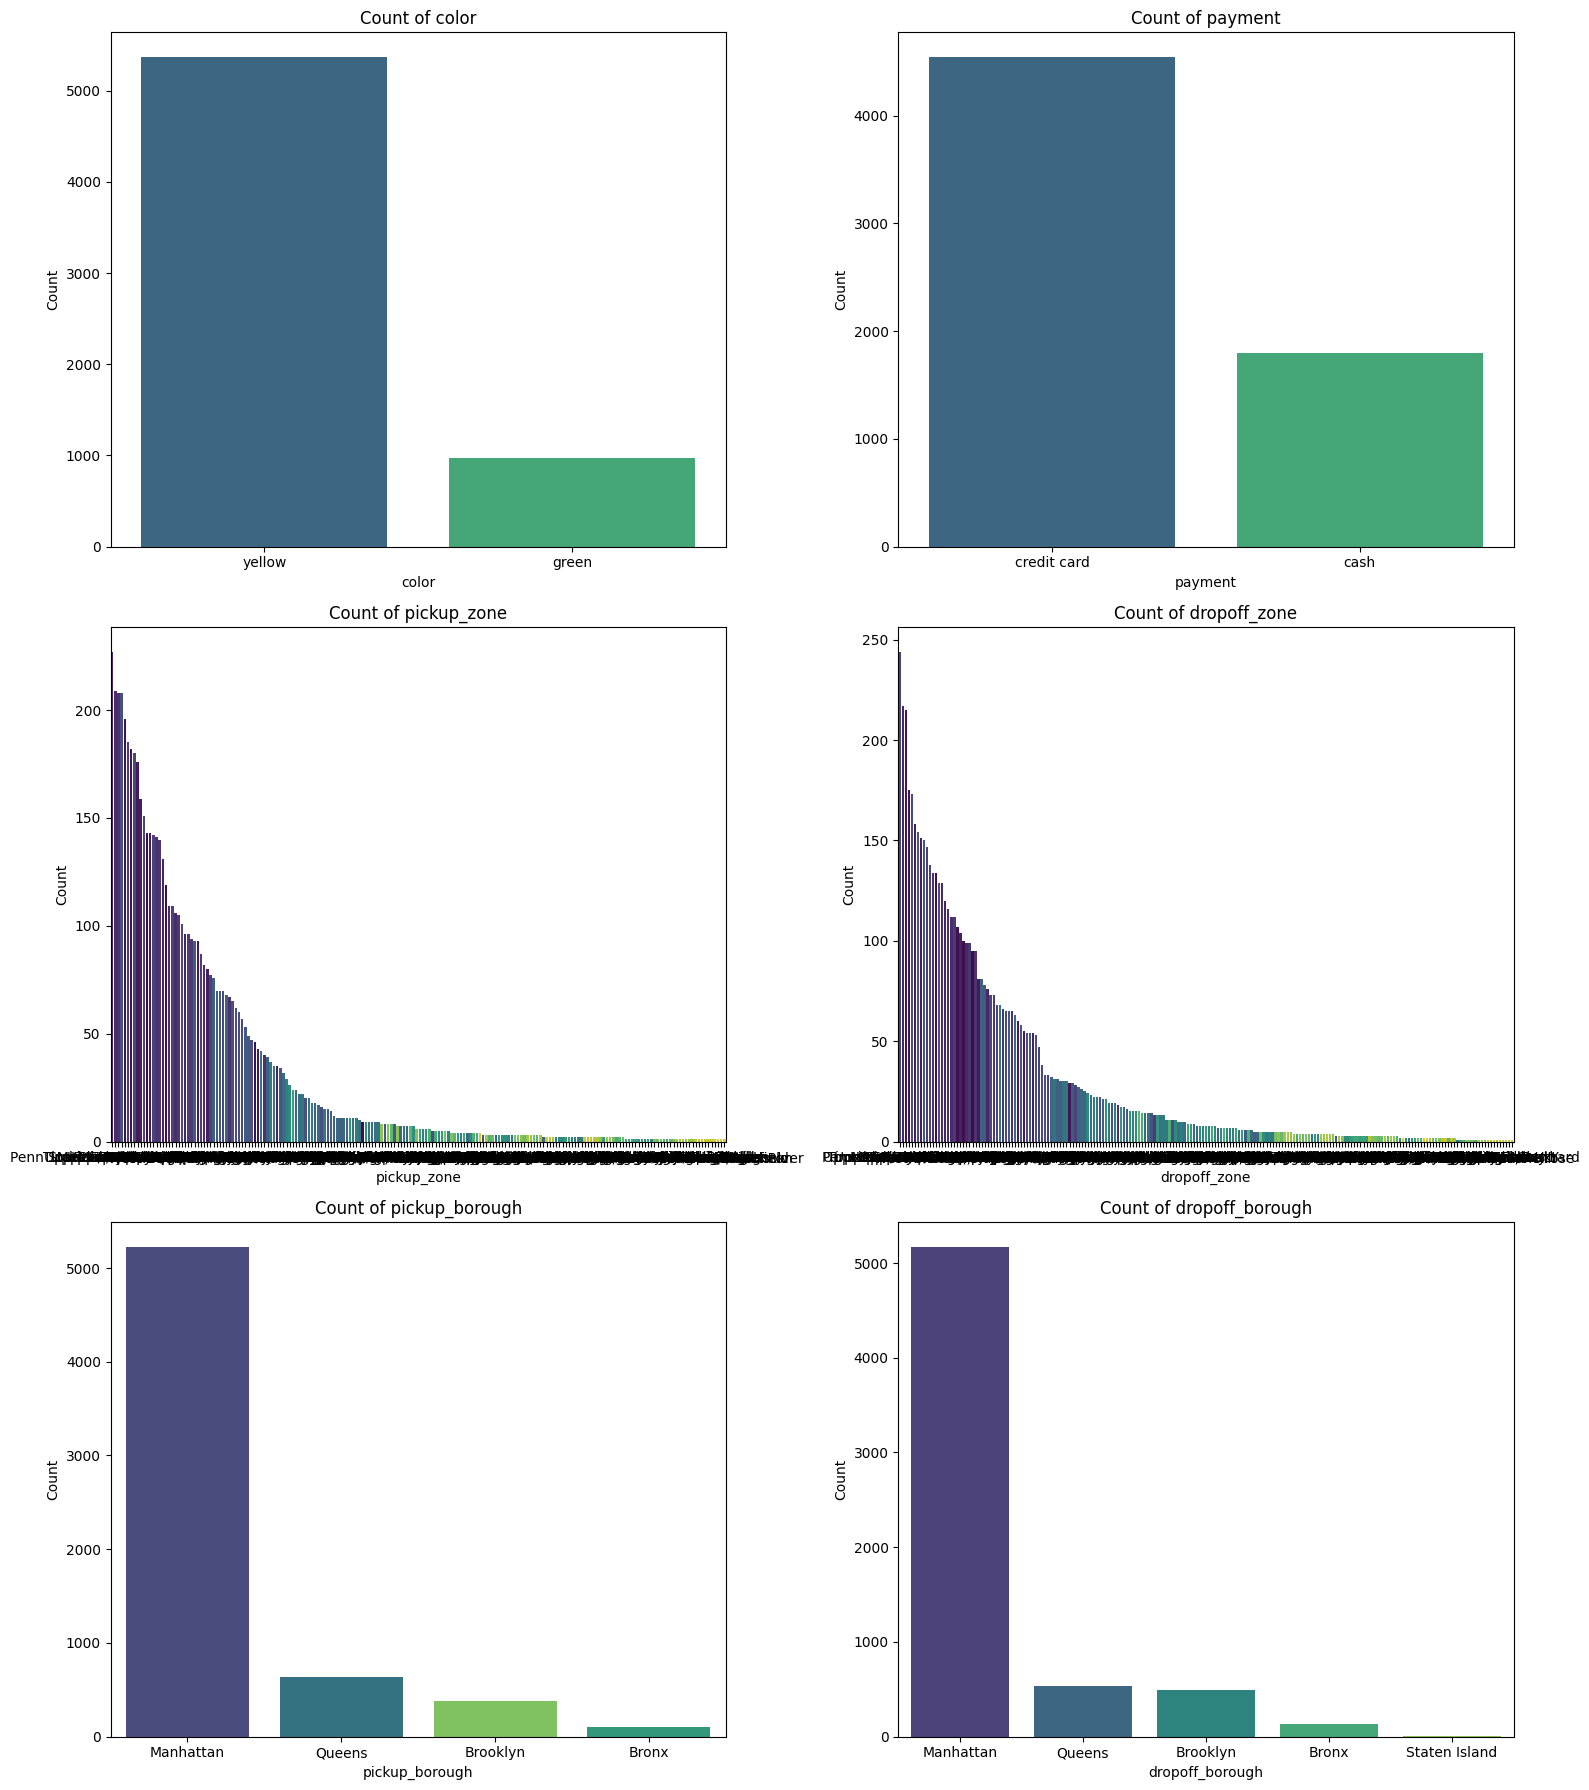

In [14]:
# Countplots for categorical feature distrubition
plt.figure(figsize=(16, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    # Order categories by frequency; Since it's categorical, we can order it how we like
    order = df[feature].value_counts().index
    sns.countplot(x=feature, data=df, order=order, hue=feature, dodge=False, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Data Explanation:** We can see that the number of pickup and dropoffs are nearly the same per borough. We can also see that Credit card is the most used payment method. The color of the taxi is mostly yellow.

## Task 2: Feature Engineering and Descriptive Statistics

**Objective:** Enhance the dataset with new features and then use descriptive statistics
to explain the distribution of the data.

### 2.1 Feature Engineering

- Create a new feature by binning a numerical variable into categories (e.g., low, medium, high). Put ranges (eg age, into three or four groups rather than a continuous distribution)
- Implement one-hot encoding for a categorical variable.

In [15]:
# Creating a new category column based on distance 
df['distance_category'] = pd.cut(df['distance'], bins=3, labels=['short', 'medium', 'long'])

# One-hot encoding the color column
df = pd.get_dummies(df, columns=['color'], dtype=int)

categorical_features.remove('color')
categorical_features.append('distance_category')

In [16]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,distance_category,color_green,color_yellow
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,short,0,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,short,0,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,credit card,Alphabet City,West Village,Manhattan,Manhattan,short,0,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,short,0,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,short,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,short,1,0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,medium,1,0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,short,1,0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,short,1,0


**Data Explanation:** We can see that the Color column has been removed and replaced with the one-hot encoding (color_green, color_yellow) columns. We can also see that a 'distance_category' column has been added.

### 2.2 Descriptive Statistics

- Calculate the mean, median, and standard deviation for numerical features.
- For categorical features, count the frequency of each category.

In [17]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color_green,color_yellow
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263,0.152657,0.847343
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000,0.000000,0.000000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000,0.000000,1.000000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000,0.000000,1.000000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000,0.000000,1.000000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000,1.000000,1.000000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365,0.359685,0.359685


**Data Explanation:** The change since last df.describe() is that color_green and color_yellow have been added as columns as they were one-hot encoded. Though they don't say much, other than that the mean value * 100 is the percentage of green and yellow taxis.

In [18]:
for col in categorical_features:
    print(f'{col} value counts:')
    print(df[col].value_counts())
    print('\n')

payment value counts:
payment
credit card    4546
cash           1795
Name: count, dtype: Int64


pickup_zone value counts:
pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
                               ... 
Ozone Park                        1
Glendale                          1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: Int64


dropoff_zone value counts:
dropoff_zone
Upper East Side North    244
Murray Hill              217
Midtown Center           215
Midtown East             175
Upper East Side South    173
                        ... 
Queensboro Hill            1
Homecrest                  1
Madison                    1
Morrisania/Melrose         1
Brooklyn Navy Yard         1
Name: count, Length: 203, dtype: Int64


pickup_borough value counts

### 2.3 Visualization

- Use seaborn to create box plots for numerical features to identify outliers.
- Visualize the distribution of categorical features using bar plots.

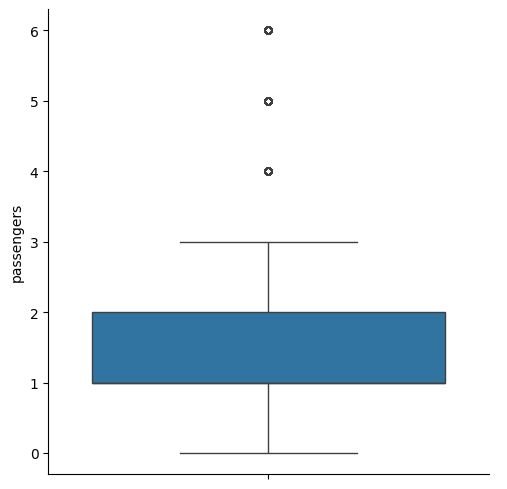

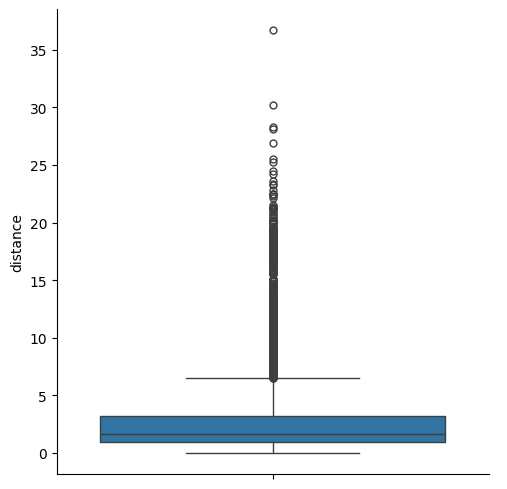

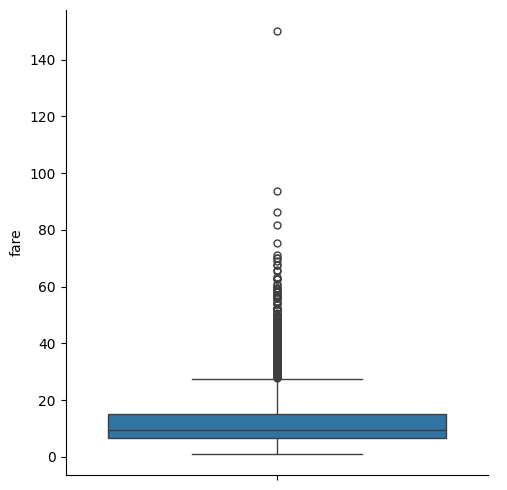

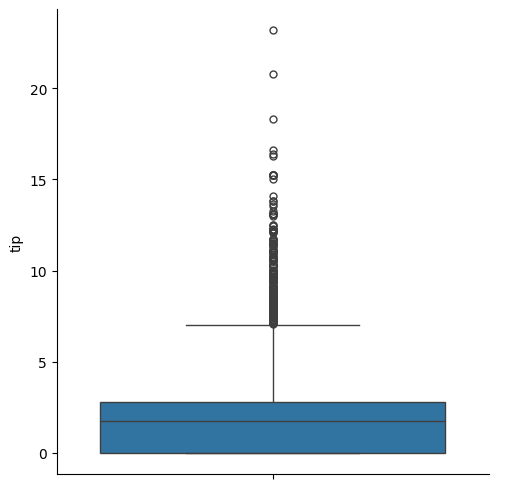

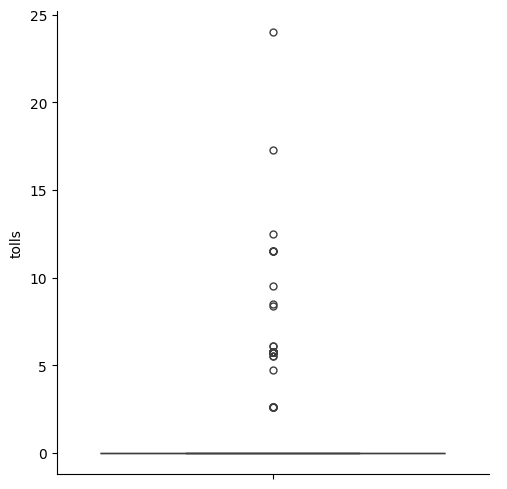

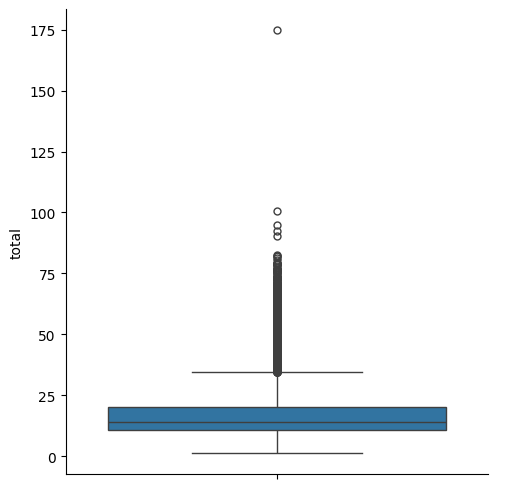

In [19]:
for col in quantative_features:
    sns.catplot(data=df, y=col, kind='box')

**Data Explanation:** We can see that there are a few big outliers

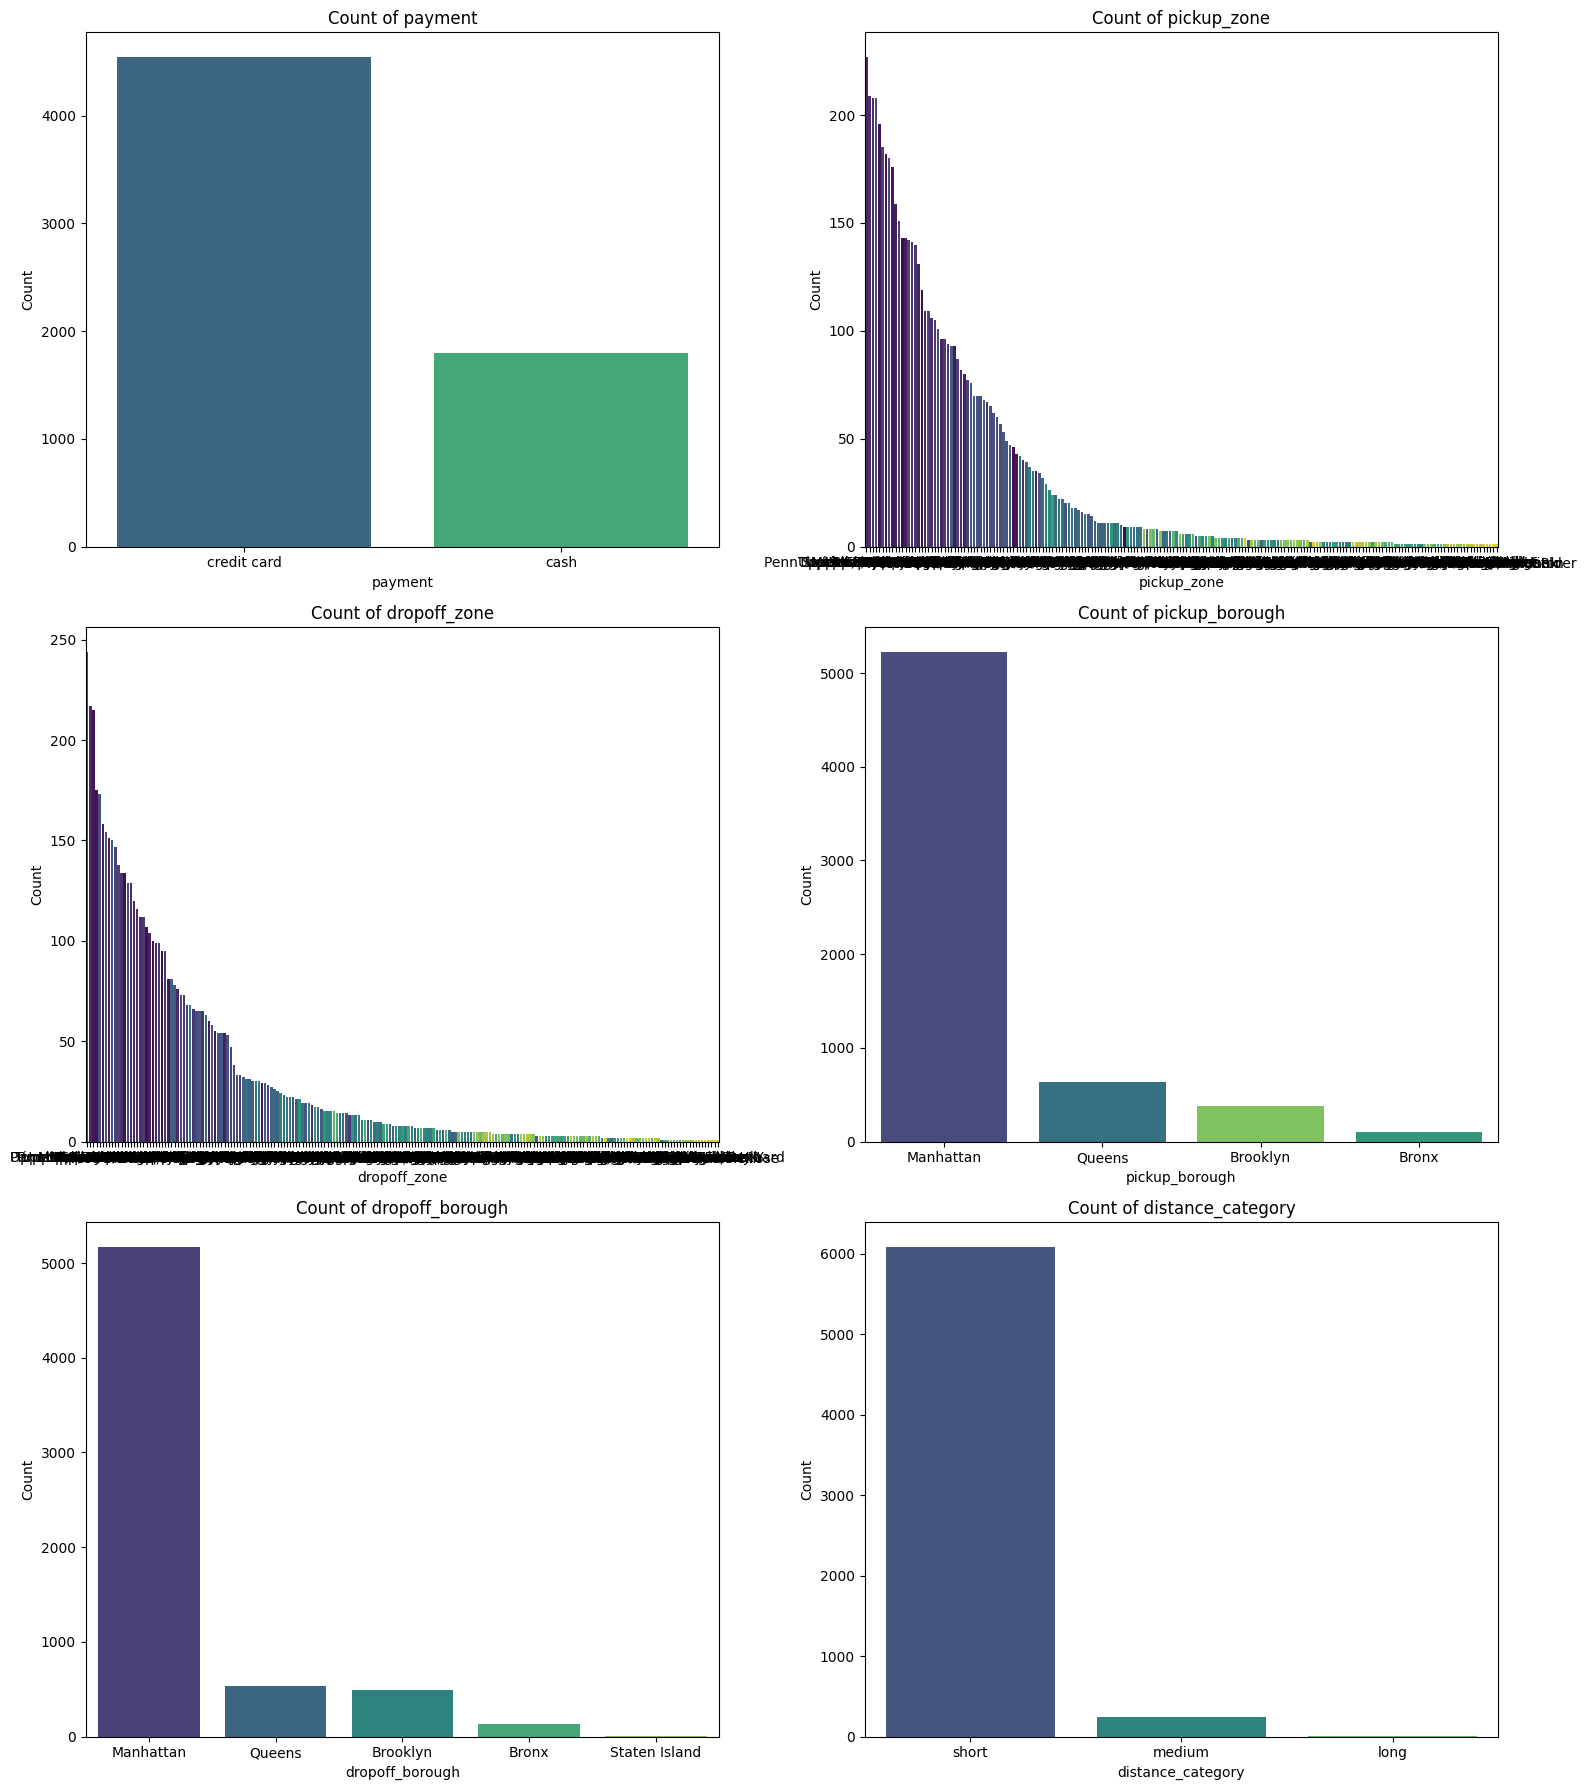

In [20]:
# Countplots for categorical feature distrubition
plt.figure(figsize=(16, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    # Order categories by frequency; Since it's categorical, we can order it how we like
    order = df[feature].value_counts().index
    sns.countplot(x=feature, data=df, order=order, hue=feature, dodge=False, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Data Explanation:** Same graph as before, since it is the same data. Only difference is that 'color' has been removed and 'distance_category' has been added.

## Task 3: Data Wrangling and Analysis

**Objective:** Perform data wrangling to prepare data for analysis and conduct simple
analysis to extract stories about the data - what can we say about this data?.

### 3.1 Data Selection and Wrangling

- Select a subset of columns relevant to a hypothetical question of interest (e.g., predicting a target variable).
- Use .groupby() to aggregate data and calculate mean values for each category of a selected categorical variable.

**Hypothecial Question:** How does the pickup borough affect the fare, distance and tip?

In [21]:
subset_df = df[['fare', 'tip', 'distance', 'pickup_borough']]
borough_df = subset_df.groupby('pickup_borough').mean().reset_index()
borough_df['tip_per_10_miles'] = (borough_df['tip'] / borough_df['distance']) * 10
borough_df['fare_per_10_miles'] = (borough_df['fare'] / borough_df['distance']) * 10

print("Mean values by Pickup Borough:")
display(borough_df)

Mean values by Pickup Borough:


,pickup_borough,fare,tip,distance,tip_per_10_miles,fare_per_10_miles
0,Bronx,20.999091,0.148586,5.725859,0.259500,36.674135
1,Brooklyn,16.453651,0.979127,4.108651,2.383086,40.046360
2,Manhattan,11.097287,1.945597,2.339365,8.316775,47.437181
3,Queens,24.184263,3.066458,7.308793,4.195573,33.089271


**Data Explanation:** We can see that even though the tip is higner on average when you're picked up in Queens, it is not the highest tip per 10 miles, which is Manhattan, but their average distances are lower, so therefor the tip is lower. The same is correct for the fare, where even though the higest fare is in Queens, it is actually the lowest fare per 10 miles.

### 3.2 Data Analysis

- Use seaborn to create scatter plots to visualize relationships between pairs of numerical variables.(X an Y axis are used for the variables)
- Create a pairplot to visualize the pairwise relationships in the dataset.

See https://seaborn.pydata.org/generated/seaborn.pairplot.html

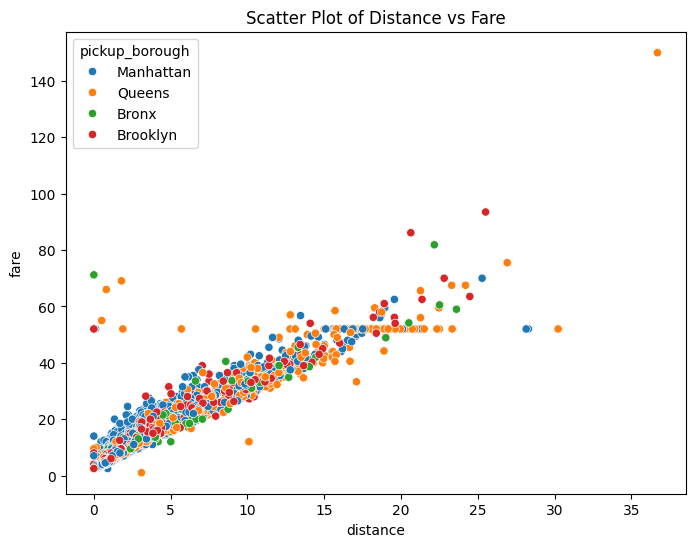

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='distance', y='fare', hue='pickup_borough')
plt.title("Scatter Plot of Distance vs Fare")
plt.show()

**Data Explanation:** This is a scatterplot graph over the distance and fare colored by the pickup borough.

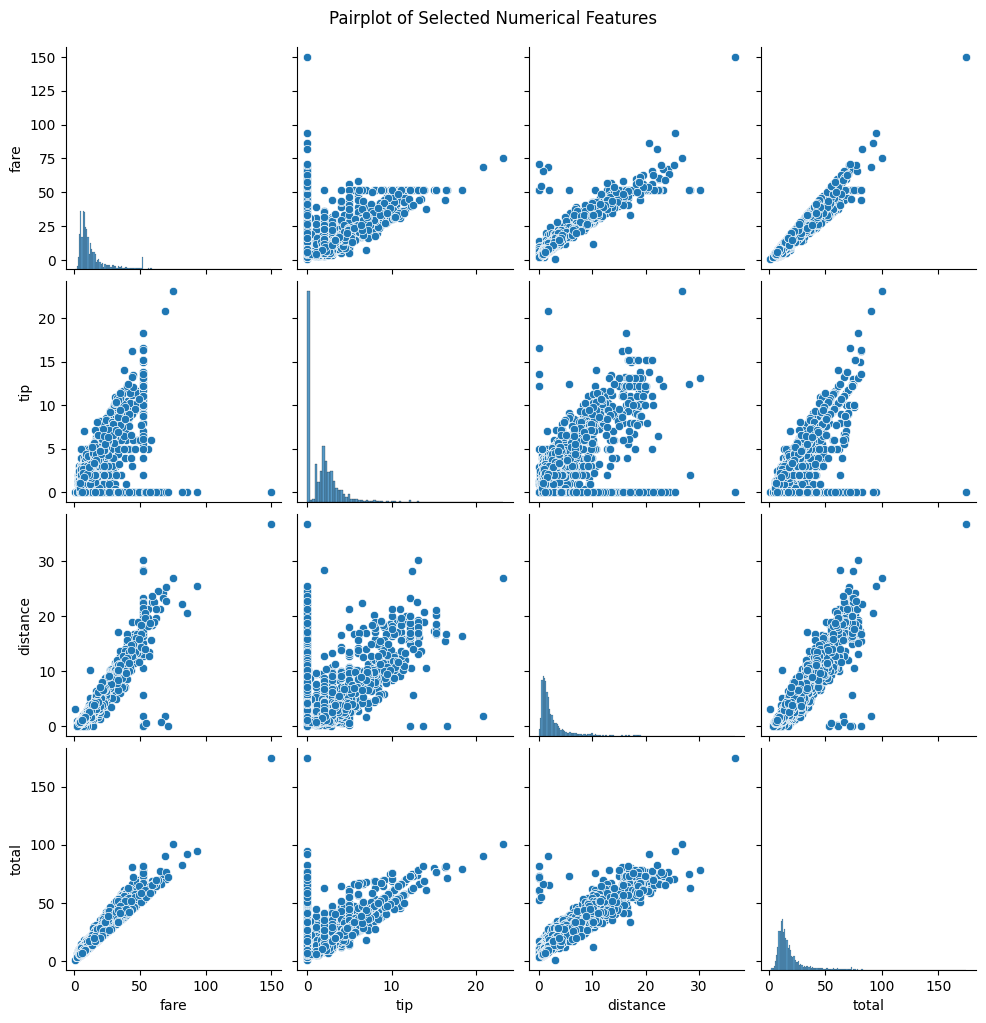

In [23]:
# Pairplot for selected numerical features
sns.pairplot(df[['fare', 'tip', 'distance', 'total']])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

**Data Explanation:** This is a pairplot graph over the fare, tip, distance and total.

### 3.3 Insights:

- Based on the visualizations and descriptive statistics, write down 3 insights about the dataset.

Three insights about the dataset are:

1. The data is left-skewed in all numerical columns, meaning that most of the values are on the lower end of the scale.
2. The distance and fare mostly follow a linear relationship, meaning that the further you go, the more base pay is charged.
3. The number of pickup and dropoffs per borough is nearly the same.